<a href="https://colab.research.google.com/github/IreneCalle/BikeSharingKaggle/blob/main/BikeSharing_EDA%2BMODEL_ES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

En este proyecto final se trabajará sobre un dataset sobre alquiler de bicicletas. El objetivo del proyecto final es predecir la demanda de bicicletas a partir de la combinación de datos históricos sobre demanda y clima.

El conjunto de datos corresponde a datos de alquiler por hora y abarcan dos años de información. El subconjunto de *train* está compuesto por los primeros 19 días de cada mes, mientras que el subconjunto de *test* va desde 20 hasta el final del mes.

In [ ]:
#importe todas las librerias necesarias, por ejemplo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
pd.set_option('display.float_format', '{:.2f}'.format)
plt.rcParams['figure.figsize'] = (10, 6)

# URL del archivo CSV
!wget https://raw.githubusercontent.com/pbonillor/DATA_SCIENCE_CON_PYTHON/main/MODULO_VI/train.csv
!wget https://raw.githubusercontent.com/pbonillor/DATA_SCIENCE_CON_PYTHON/main/MODULO_VI/test.csv


# LEER DATA SET
# Cargar el archivo CSV en un DataFrame de pandas
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
print("MUESTRA DE TRAIN")
display(df_train.head())
filas, columnas = df_train.shape
print("Filas:", filas, " || Columnas:", columnas)


--2023-11-24 16:02:35--  https://raw.githubusercontent.com/pbonillor/DATA_SCIENCE_CON_PYTHON/main/MODULO_VI/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>] 633.16K  --.-KB/s    in 0.04s   

2023-11-24 16:02:35 (16.3 MB/s) - ‘train.csv’ saved [648353/648353]

--2023-11-24 16:02:35--  https://raw.githubusercontent.com/pbonillor/DATA_SCIENCE_CON_PYTHON/main/MODULO_VI/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3238

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1


Filas: 10886  || Columnas: 12


## Parte 1 - Análisis de los datos

#### Objetivos

 - Analizar el conjunto de datos con las diferentes funciones de *pandas* que crea pertinente.

# **Nuestro conjunto de datos**


El alquiler de bicicletas está **estrechamente relacionado con el entorno y los cambios estacionales**. Por ejemplo, las condiciones climáticas, lluvias, el día de la semana, la estación del año, la hora del día, y otros factores, pueden influir en los patrones de alquiler. El conjunto principal de estos datos se refiere al registro histórico de dos años correspondiente a los años 2011 y 2012 del sistema de alquiler de bicicletas Capital Bikeshare en Washington D.C., Estados Unidos. Estos datos están disponibles en http://capitalbikeshare.com/system-data.





**DICCIONARIO DE CLAVES**

- `datetime`: Marca de tiempo que indica la fecha y hora de los registros.
- `season`: Estación del año (primavera, verano, otoño, invierno).
- `holiday`: Variable binaria que indica si es un día festivo o no.
- `workingday`: Variable binaria que indica si es un día laborable o no.
- `weather`: Condición climática (por ejemplo, soleado, lluvioso, nevado, nublado, etc.). 1: Soleado o despejado.2: Neblina, nublado o parcialmente nublado. 3: Llovizna o ligera lluvia. 4: Lluvia intensa, tormenta, nieve o condiciones climáticas extremas.
- `temp`: Temperatura en grados Celsius.
- `atemp`: Sensación térmica en grados Celsius.
- `humidity`: Humedad relativa.
- `windspeed`: Velocidad del viento.
- `casual`: Número de alquileres de bicicletas por parte de usuarios no registrados.
- `registered`: Número de alquileres de bicicletas por parte de usuarios registrados.
- `count`: Total de alquileres de bicicletas (suma de alquileres `casual` y `registered`).


## **EDA: Análisis exploratorio de los datos**

In [ ]:
# En primer lugar vamos a visualizar un poco mejor nuestro conjunto
df_train["datetime"] = pd.to_datetime(df_train["datetime"])# conversión de la columna en formato fecha
df_train.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1


In [ ]:
# Mostramos primeros registros:
display(df_train.head(5))

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1


In [ ]:
# Vamos a analizar las columnas y los tipos de datos correspondientes a cada una de ellas
display(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


None

In [ ]:
print(f"Nulos TRAIN\n{df_train.isna().sum()}")
print()
print(f"Nulos TEST\n{df_test.isna().sum()}")
# Nuestrp conjunto de datos, afortunadamente, no presenta nulos

Nulos TRAIN
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

Nulos TEST
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64


In [ ]:
# Usamos la función describe para analizar a golpe de vista el contenido de nuestras columnas
display(df_train.describe())

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00
mean,2.51,0.03,0.68,1.42,20.23,23.66,61.89,12.80,36.02,155.55,191.57
std,1.12,0.17,0.47,0.63,7.79,8.47,19.25,8.16,49.96,151.04,181.14
min,1.00,0.00,0.00,1.00,0.82,0.76,0.00,0.00,0.00,0.00,1.00
25%,2.00,0.00,0.00,1.00,13.94,16.66,47.00,7.00,4.00,36.00,42.00
50%,3.00,0.00,1.00,1.00,20.50,24.24,62.00,13.00,17.00,118.00,145.00
75%,4.00,0.00,1.00,2.00,26.24,31.06,77.00,17.00,49.00,222.00,284.00
max,4.00,1.00,1.00,4.00,41.00,45.45,100.00,57.00,367.00,886.00,977.00


In [ ]:
# Vamos a mirar la columna del tiempo, observamos que se distribuye en 4 valores

display(df_train['weather'].unique())



array([1, 2, 3, 4])

weather
1   205.24
2   178.96
3   118.85
4   164.00
Name: count, dtype: float64


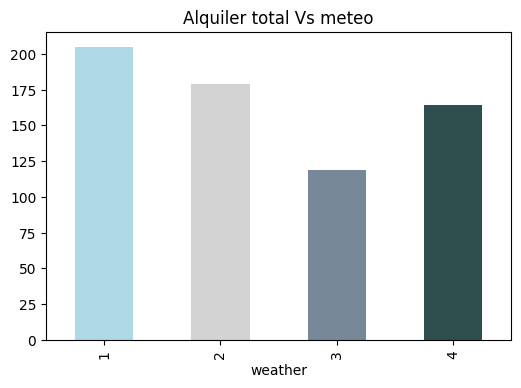

In [ ]:
# Podemos comprobar a simple vista el tiempo vs el total de bicicletas alquiladas con la función groupby
# Calcular la media de 'count' según el tipo de tiempo ('weather')
media_por_clima = df_train.groupby('weather')['count'].mean()
# Mostrar los resultados
print(media_por_clima)
plt.figure(figsize=(6, 4))
media_por_clima.plot(kind="bar", color = ["lightblue", "lightgray", "lightslategray", "darkslategrey"], title = "Alquiler total Vs meteo");

# Parece que a peor tiempo, peores cifras de alquiler


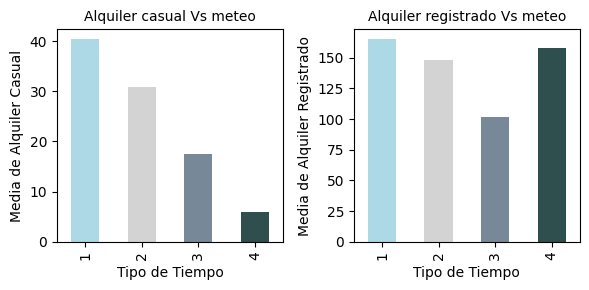

In [ ]:
# Vamos a compararlo con el alquiler de bicicletas casual
media_por_clima_cas = df_train.groupby('weather')['casual'].mean()
media_por_clima_reg = df_train.groupby('weather')['registered'].mean()

# Crear subplots con 2 columnas
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))

# Gráfico para alquiler casual vs tipo de tiempo ('weather')
media_por_clima_cas.plot(kind="bar", color=["lightblue", "lightgray", "lightslategray", "darkslategrey"], ax=ax1)
ax1.set_title("Alquiler casual Vs meteo", fontsize=10)
ax1.set_xlabel("Tipo de Tiempo")
ax1.set_ylabel("Media de Alquiler Casual")

# Gráfico para alquiler registrado vs tipo de tiempo ('weather')
media_por_clima_reg.plot(kind="bar", color=["lightblue", "lightgray", "lightslategray", "darkslategrey"], ax=ax2)
ax2.set_title("Alquiler registrado Vs meteo", fontsize=10)
ax2.set_xlabel("Tipo de Tiempo")
ax2.set_ylabel("Media de Alquiler Registrado")

# Ajustes de diseño y espaciado
plt.tight_layout()
plt.show()

# El alquiler casual es inversamente proporcional al tiempo, mientras que el de usuarios registrados se mantiene más estable.


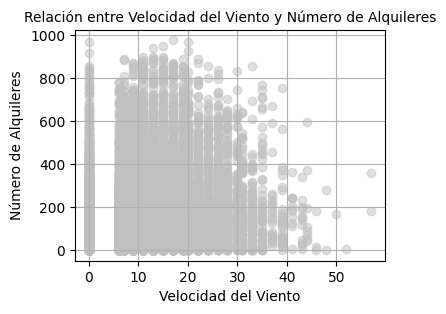

In [ ]:
# Vamos a considerar otros factores meteorológicos, como el viento:

# Graficar velocidad del viento vs número de alquileres
plt.figure(figsize=(4, 3))
plt.scatter(df_train['windspeed'], df_train['count'], alpha=0.5, color='silver')
plt.title('Relación entre Velocidad del Viento y Número de Alquileres', fontsize=10)
plt.xlabel('Velocidad del Viento')
plt.ylabel('Número de Alquileres')
plt.grid(True)
plt.show()

# Parece que a partir de los 20 km/ hora baja bastante el alquiler

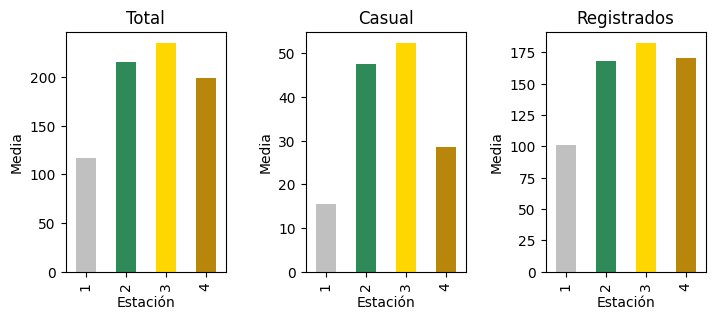

In [ ]:
from mpl_toolkits.mplot3d import axes3d
# Pasemos a comprobar las variables estacionales:
# Vamos a compararlo con el alquiler de bicicletas casual
media_est = df_train.groupby('season')['count'].mean()
media_est_cas = df_train.groupby('season')['casual'].mean()
media_est_reg = df_train.groupby('season')['registered'].mean()

# Crear subplots con 3 columnas
fig, (ax1, ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))


media_est.plot(kind="bar", color=["silver", "seagreen", "gold", "darkgoldenrod"], ax=ax1)
ax1.set_title("Total")
ax1.set_xlabel("Estación", fontsize=10)
ax1.set_ylabel("Media", fontsize=10)


media_est_cas.plot(kind="bar", color=["silver", "seagreen", "gold", "darkgoldenrod"], ax=ax2)
ax2.set_title("Casual")
ax2.set_xlabel("Estación", fontsize=10)
ax2.set_ylabel("Media", fontsize=10)

media_est_reg.plot(kind="bar", color=["silver", "seagreen", "gold", "darkgoldenrod"], ax=ax3)
ax3.set_title("Registrados")
ax3.set_xlabel("Estación", fontsize=10)
ax3.set_ylabel("Media", fontsize=10)

# Ajustes de diseño y espaciado
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.5, wspace=0.5)

plt.show()
# Al igual que con la climatología, la estacionalidad afecta más a los usuarios casuales, aunque ambos presentan un pico de uso.

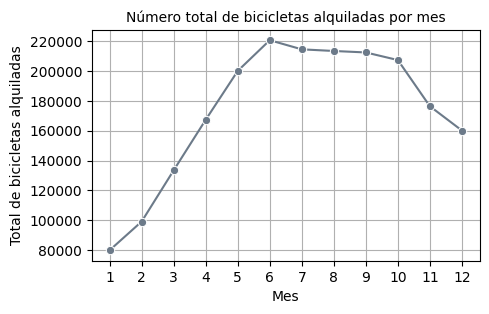

In [ ]:
# Vamos a ver las ventas mensualmente
# Nueva columna con meses

# Si no lo hubiéramos hecho antes, convertir a datetime df['datetime'] = pd.to_datetime(df['datetime'])
# Crear nueva columna con los meses

df_train['month'] = df_train['datetime'].dt.month
alquiler_mes = df_train.groupby('month')['count'].sum().reset_index()
plt.figure(figsize=(5, 3))
sns.lineplot(x='month', y='count', data=alquiler_mes, marker='o', color='#6C7A89')
plt.title('Número total de bicicletas alquiladas por mes', fontsize=10)
plt.xlabel('Mes')
plt.ylabel('Total de bicicletas alquiladas')
plt.xticks(range(1, 13))  # Etiquetas de los meses del 1 al 12
plt.grid(True)
plt.show()

# Los alquileres alcanzan su pico en junio y descienden con el fin del verano


<ipython-input-13-5a104fbc2ed3>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), annot=True, cmap=cmap)


<Axes: >

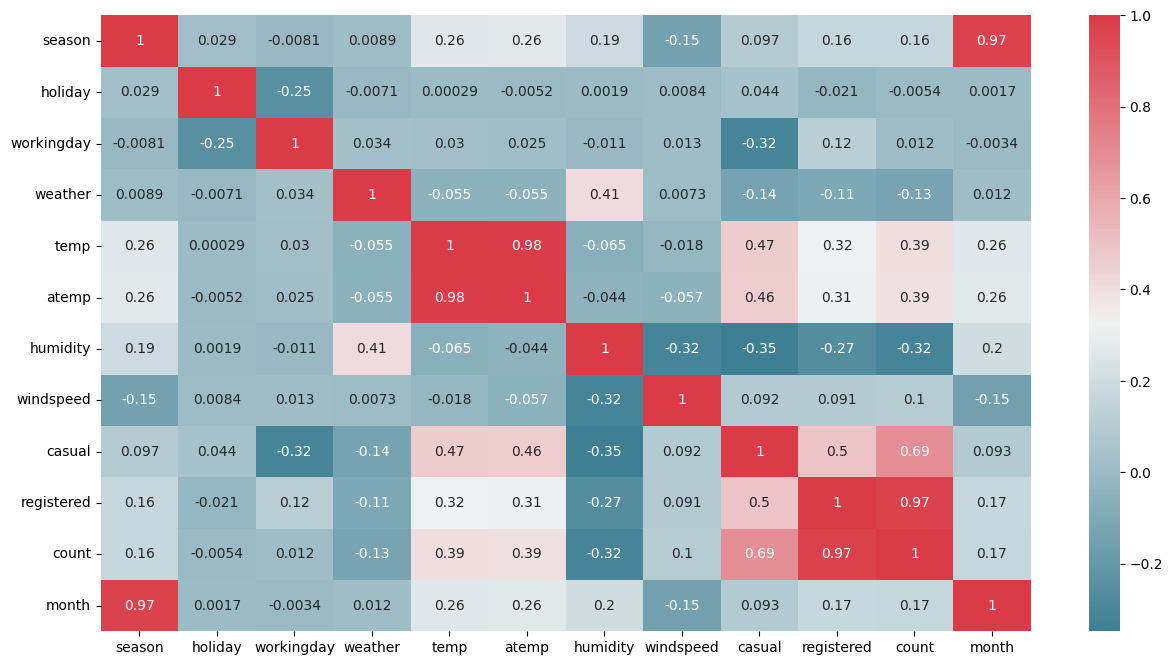

In [ ]:
# Generamos matriz de correlacion para entender nuestras variables de forma completa
plt.figure(figsize=(15,8))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_train.corr(), annot=True, cmap=cmap)

#### Preguntas:

 - ¿Qué efecto tiene el tiempo (meteorológico) sobre el alquiler de bicicletas? ¿Es el mismo para clientes registrados y casuales? ¿Coincide esto con lo que asumiría a priori?
 - Vamos a trabajar con las codificaciones por defecto (salvo datetime que veremos en la Parte 2). ¿Le parece adecuado?
 - ¿Qué puede decir sobre la correlación entre *season* y *casual*?


<p style="font-size:13px; color:#BB0000;">Respuesta a preguntas </p>
1- Sí, el buen tiempo se traduce en más alquileres, y es menos dependiente para los usuarios registrados. A priori los datos obtenidos son lógicos. .

2- El uso de la estación del año me parece simplificar el modelo, y quizás algunos datos con mucha varianza, como la humedad, deberían ser escalados. Con todo, tenemos la suerte de contar con un modelo numérico, prácticamente preparado para el análisis.
Otro aspecto a considerar es la reducción de variables, parece haber muchas meteorológicas que pueden estar apuntando al mismo factor de decisión.

3. La relación season-casual muestra una temporada alta de bicicletas en las estaciones centrales (primavera, y especialmente verano) de nuestro estudio. Se infiere que las personas no usuarias prefieren los meses cálidos para desplazarse en este metio de transporte.

## Parte 2 - Características temporales

La primer columna de los datos (*datetime*) corresponde a las marcas de tiempo asociadas a cada instancia. Para que estos tengan el orden cronológico que representan es necesario pasarlos de tipo *string* a tipo *datetime*. Para esto *Pandas* proporciona la función *to_datetime()*. Correr la siguiente celda para hacer el cambio.

In [ ]:
df_train['datetime'] = pd.to_datetime(df_train['datetime'])

##### La figura siguiente muestra cómo varía la cantidad de bicicletas alquiladas en función del tiempo.

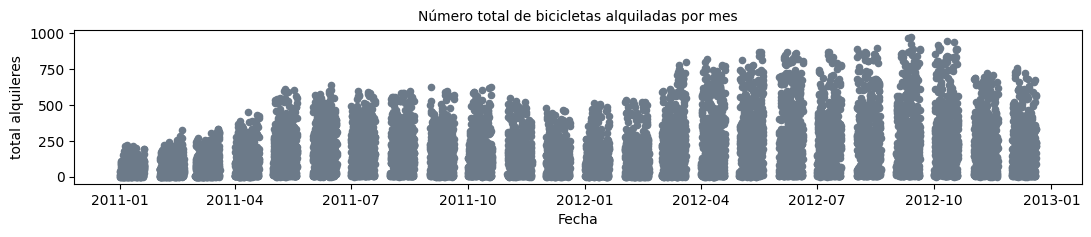

In [ ]:
df_train.plot(x='datetime', y='count', figsize=[13,2],kind='scatter',color='#6C7A89')
plt.xlabel('Fecha',fontsize=10)
plt.ylabel('total alquileres',fontsize=10)
plt.title('Número total de bicicletas alquiladas por mes', fontsize=10)
plt.show()

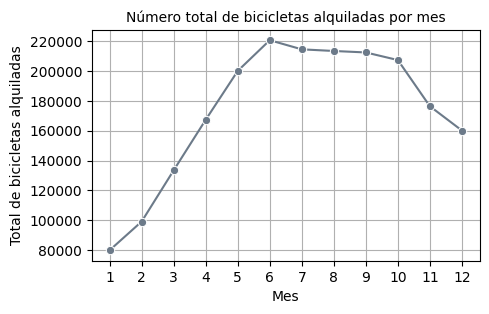

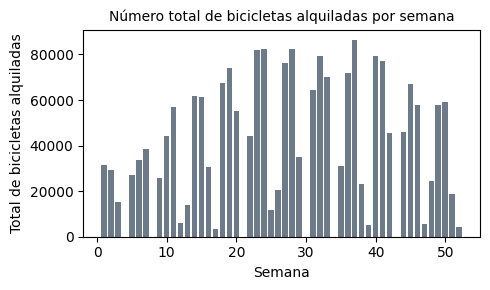

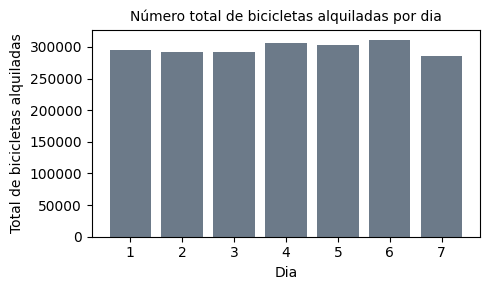

In [ ]:


# Alquiler por mes

df_train['month'] = df_train['datetime'].dt.month
alquiler_mes = df_train.groupby('month')['count'].sum().reset_index()
plt.figure(figsize=(5, 3))
sns.lineplot(x='month', y='count', data=alquiler_mes, marker='o', color='#6C7A89')
plt.title('Número total de bicicletas alquiladas por mes', fontsize=10)
plt.xlabel('Mes')
plt.ylabel('Total de bicicletas alquiladas')
plt.xticks(range(1, 13))  # Etiquetas de los meses del 1 al 12
plt.grid(True)
plt.show()

# Los alquileres alcanzan su pico en junio y descienden con el fin del verano


# Analisis semanal
import matplotlib.pyplot as plt

df_train['week'] = df_train['datetime'].dt.isocalendar().week
alquiler_sem = df_train.groupby('week')['count'].sum().reset_index()

plt.figure(figsize=(5, 3))
plt.bar(alquiler_sem['week'], alquiler_sem['count'], color='#6C7A89')
plt.title('Número total de bicicletas alquiladas por semana', fontsize=10)
plt.xlabel('Semana')
plt.ylabel('Total de bicicletas alquiladas')
plt.tight_layout()
plt.show()



# Analisis diario

import matplotlib.pyplot as plt

df_train['day'] = df_train['datetime'].dt.isocalendar().day
alquiler_day = df_train.groupby('day')['count'].sum().reset_index()

plt.figure(figsize=(5, 3))
plt.bar(alquiler_day['day'], alquiler_day['count'], color='#6C7A89')
plt.title('Número total de bicicletas alquiladas por dia', fontsize=10)
plt.xlabel('Dia')
plt.ylabel('Total de bicicletas alquiladas')
plt.tight_layout()
plt.show()


#### Preguntas:

- ¿Le parece razonable la division en conjuntos de train y test que se tomó en el desafío?
- ¿Cómo varían temporalmente (día, semana, mes, año) los alquileres?

<p style="font-size:13px; color:#BB0000;"> Respuesta a preguntas</p>

1.
- La división en días altera nuestros datos si los dividimos, por ejemplo, en semanas, haciendo el último tramo más corto, y puede afectar a las predicciones en fechas festivas que se sitúan a final de mes, como navidad, si quisiéramos predecir las ventas de una fecha concreta. Hubiera sido más preciso quizás seleccionar distintos criterios de segmentación.

-Además, en la investigación de consumo habitualmente es interesante conocer el día del mes en que se encuentra el consumidor, pues los patrones de compra atienden a estas fechas en función de fenómenos como la recepción de su salario.

2.

- Como se ha ido comentando a lo largo del cuaderno, se presenta fuerte estacionalidad para el alquiler casual, correspondiente a verano,junio y julio, sábados, buen tiempo, siendo más estable el consumo de registrados.

El tipo de dato *datetime* permite extraer de forma sencilla datos categóricos como la hora, el día de la semana, entre otros. La siguiente celda agrega a los datos de *train* estas nuevas características.

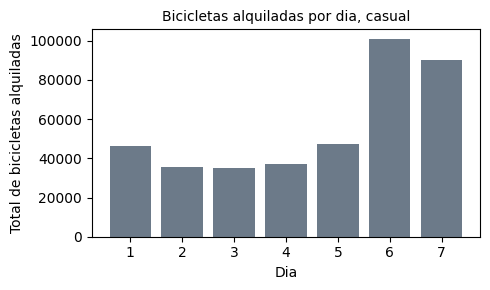

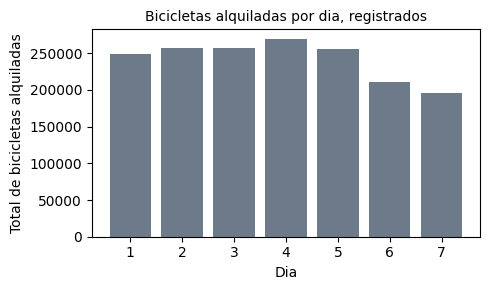

In [ ]:
# Diario, casual (asumimos que en los fines de semana habra un pico).
# Analisis diario

import matplotlib.pyplot as plt

df_train['day_cas'] = df_train['datetime'].dt.isocalendar().day
alquiler_day_c = df_train.groupby('day_cas')['casual'].sum().reset_index()

plt.figure(figsize=(5, 3))
plt.bar(alquiler_day_c['day_cas'], alquiler_day_c['casual'], color='#6C7A89')
plt.title('Bicicletas alquiladas por dia, casual', fontsize=10)
plt.xlabel('Dia')
plt.ylabel('Total de bicicletas alquiladas')
plt.tight_layout()
plt.show()


df_train['day_reg'] = df_train['datetime'].dt.isocalendar().day
alquiler_day_c = df_train.groupby('day_reg')['registered'].sum().reset_index()

plt.figure(figsize=(5, 3))
plt.bar(alquiler_day_c['day_reg'], alquiler_day_c['registered'], color='#6C7A89')
plt.title('Bicicletas alquiladas por dia, registrados', fontsize=10)
plt.xlabel('Dia')
plt.ylabel('Total de bicicletas alquiladas')
plt.tight_layout()
plt.show()
# Efectivamente, observamos el pico para los casuales

#### Ejercicio:

 - Grafique count, registered y casual en función de las horas y el día de la semana. ([*Sugerencia:*](https://seaborn.pydata.org/generated/seaborn.barplot.html) Ejemplos de la librería *seaborn*)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,week,day,day_cas,day_reg,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16,1,52,6,6,6,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40,1,52,6,6,6,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32,1,52,6,6,6,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13,1,52,6,6,6,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1,1,52,6,6,6,4,5


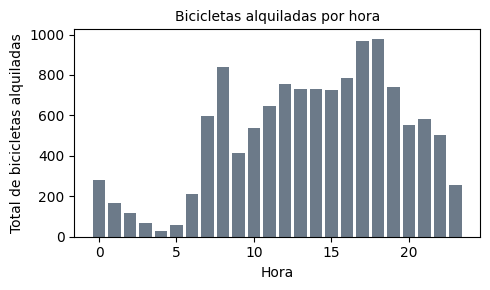

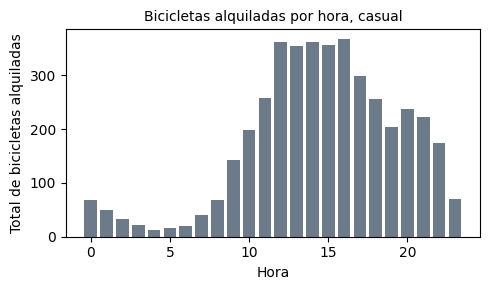

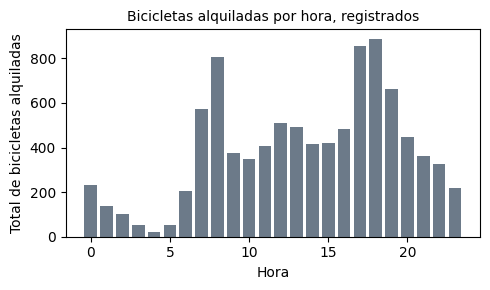

In [ ]:
df_train['hour'] = df_train['datetime'].dt.hour
df_train['weekday'] = df_train['datetime'].dt.weekday

display(df_train.head())


plt.figure(figsize=(5, 3))
plt.bar(df_train['hour'], df_train['count'], color='#6C7A89')
plt.title('Bicicletas alquiladas por hora', fontsize=10)
plt.xlabel('Hora')
plt.ylabel('Total de bicicletas alquiladas')
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 3))
plt.bar(df_train['hour'], df_train['casual'], color='#6C7A89')
plt.title('Bicicletas alquiladas por hora, casual', fontsize=10)
plt.xlabel('Hora')
plt.ylabel('Total de bicicletas alquiladas')
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 3))
plt.bar(df_train['hour'], df_train['registered'], color='#6C7A89')
plt.title('Bicicletas alquiladas por hora, registrados', fontsize=10)
plt.xlabel('Hora')
plt.ylabel('Total de bicicletas alquiladas')
plt.tight_layout()
plt.show()

##### A partir de las gráficas responder las siguientes preguntas:

 - ¿Cómo explicaría la diferencia entre las distribuciones de los clientes registrados y casuales?
 - ¿Qué desventaja le encuentra a utilizar un regresor lineal para predecir los alquileres a partir de la hora del día?¿Cómo transformaría esta característica para paliar este problema?
 - ¿Es necesaria esta transformación cuando se utilizan Árboles de Decisión?

Respuestas:

1- Se aprecian patrones propios de las rutinas de desplazamiento por trabajo o estudios en horas de mañana y tarde en los registrados, mientras que los casuales apuntan a patrones de ocio, con predominio de festivos e inicio de los picos más tarde a lo largo del día. La hora punta se concentra en los casuales en horas centrales.

2- La principal desventaja de utilizar un regresor lineal para predecir los alquileres a partir de la hora del día es que este modelo supone una relación lineal entre la hora y la cantidad de alquileres, lo cual puede no capturar patrones más complejos. Las relaciones pueden tener variaciones no lineales a lo largo del día, como picos en horas específicas (por ejemplo, horas punta de tráfico) o fluctuaciones dependientes de otros factores, como el clima o días festivos.


3- Para superar la limitación de la linealidad en la relación entre la hora del día y la cantidad de alquileres, se podrían utilizar técnicas como la creación de variables categóricas para diferentes franjas horarias que no supusieran una linealidad.

4 - Los Árboles de Decisión son capaces de capturar relaciones no lineales en los datos de forma inherente. Por lo tanto, la transformación de la característica de hora del día no es estrictamente necesaria al utilizar Árboles de Decisión, aunque es una buena práctica. Por ejemplo, al aplicar un árbol al clásico dataset del titanic, aunque la edad no es una variable categórica, el árbol detecta el corte de edad que corresponde a los niños y establece un punto de corte sobre el que tomar la decisión binaria de supervivencia en el caso de los hombres.




#### Selección de Características:

*   Entre el día, el mes y el año ¿cuáles de estos datos les pareces agregar como nuevas características y cuáles no? y ¿Por qué?
*   Agregar las características seleccionadas.

Respuesta:

Dado el importante pico mensual, que es un rasgo común para sendos tipos de usuarios y por tanto será determinante en el acumulado, mantendremos la variable del mes, que nos permite de forma categórica establecer diferencias. Además, los modelos pueden capturar mejor la variabilidad y los patrones mensuales en comparación con variaciones más finas, como los días o las tendencias anuales.

Aunque la hora podría se importante para el negocio, por ejemplo, en caso de preveer servicio y empleados, queremos realizar predicción por día, y nuestros datos de clima están asociados a un día, así que la eliminaremos.


In [ ]:
c_drop = ["day", "day_cas", "weekday", "day_reg", "hour", "week"]

# Eliminar las columnas especificadas
df_train.drop(c_drop, axis=1, inplace=True)

display(df_train)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.70,50,26.00,7,329,336,12
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.43,57,15.00,10,231,241,12
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.91,61,15.00,4,164,168,12
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.43,61,6.00,12,117,129,12


## Parte 3 - Preparación de los datos y Métrica de evaluación

Previo a trabajar con los estimadores:

*   Apartar la columna objetivo y eliminarla del conjunto de entrenamiento.
*   Eliminar las columnas *'casual'* y *'registered'*. ¿Por qué esto es necesario?.
*   Eliminar la columna *'datetime'*.

Durante la actividad los estimadores deben ser evaluados con la misma medida de desempeño utilizada en la competencia:

Root Mean Squared Logarithmic Error (RMSLE)
$$\sqrt{\frac{1}{n}\sum_{i}^{n}\big(\log(y_{i} + 1) - \log(\hat{y}_{i} + 1)\big)^2}$$

Este tipo de medida se utiliza cuando los valores a estimar son grandes. La librería *Scikit-Learn* incluye la función de desempeño [*mean_squared_log_error*](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html#sklearn.metrics.mean_squared_log_error) (MSLE), esta función se puede utilizar  para la validación ya que alcanza las mismas soluciones que su raíz (RMSLE). De igual forma los resultados se deben mostrar con RMSLE.

-------------------------
1. Significado del Error Cuadrático Logarítmico Medio (RMSLE):
Error Cuadrático Logarítmico: En lugar de calcular la diferencia absoluta entre las predicciones y los valores reales, el RMSLE calcula la diferencia en forma de logaritmo. Esto es útil cuando las predicciones y los valores reales pueden variar en magnitudes muy grandes. La función logarítmica suaviza esas diferencias.

Media y Raíz Cuadrada: RMSLE calcula el promedio de los errores cuadráticos logarítmicos entre las predicciones y los valores reales. Luego, toma la raíz cuadrada de este promedio para obtener una métrica de error.


Manejo de valores atípicos: El uso del logaritmo puede ayudar a manejar valores extremos (valores atípicos) en los datos, reduciendo su impacto en la evaluación del modelo.

In [ ]:
# En primer lugar eliminamos la columna objetivo
y_train = y_train = df_train['count']

df_train.drop("count", axis=1, inplace=True)

In [ ]:
# Eliminamos casual y registered, porque que están altamente correlacionadas o directamente relacionadas con la variable objetivo que se está tratando de predecir.
# Queremos evitar fuga de datos
c_users = ["casual", "registered"]
df_train.drop(c_users, axis=1, inplace=True)

In [ ]:
# Eliminamos datetime
df_train.drop("datetime", axis=1, inplace=True)

In [ ]:
y_train

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

## Parte 4 - Decision Trees

### TransformedTargetRegressor

Observando los valores de las etiquetas se puede ver que la distribución de estos tiene una asimetría a la derecha, por lo que se puede aplicar una transformación logarítmica para que la distribución de las etiquetas sea más normal.


**¿Por qué se aplica una transformación logarítmica?**
La distribución original de los valores de la columna "count" muestra una asimetría hacia la derecha (skewness). Esto significa que hay una concentración de valores hacia la izquierda y una cola larga hacia la derecha en la distribución de frecuencia de esos valores. En algunos casos, esto puede hacer que los modelos de machine learning funcionen mejor si los datos se asemejan más a una distribución normal (también conocida como distribución gaussiana o en forma de campana). Una transformación logarítmica es una técnica común para corregir esta asimetría.

**¿Qué hace la transformación logarítmica?**
La función np.log1p() aplica una transformación logarítmica a los valores de la columna "count". La razón por la que se utiliza np.log1p() en lugar de np.log() es que maneja correctamente los valores cero, ya que log(0) no está definido. np.log1p() calcula log(x + 1), lo que asegura que incluso si hay valores cero, la transformación se pueda realizar correctamente.

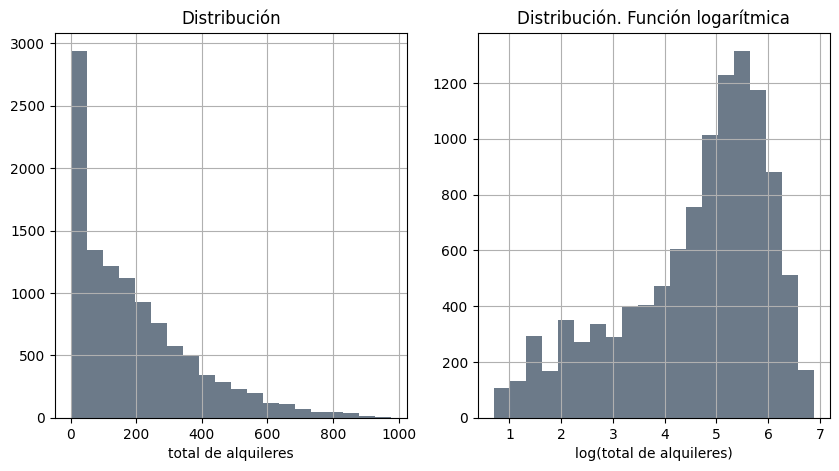

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
y_train.hist(bins=20, color='#6C7A89')
plt.xlabel('total de alquileres',fontsize=10)
plt.title("Distribución")

plt.subplot(1,2,2)
np.log1p(y_train).hist(bins=20, color='#6C7A89')
plt.xlabel('log(total de alquileres)',fontsize=10)
plt.title("Distribución. Función logarítmica")
plt.show()

Si le pasamos al regresor estas etiquetas tranformadas este predecirá el logaritmo de los alquileres, por lo que luego deberíamos calcular la exponencial del valor predicho. Por suerte, Scikit-Learn cuenta con la función [TransformedTargetRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.compose.TransformedTargetRegressor.html) que resuelve este problema.

--------
### Explicación extendida: el uso del regresor cuando empleamos la trasnformación logarítmica



**Contexto:**
En el contexto de la regresión, a menudo se trabaja con variables objetivo (etiquetas) que tienen una distribución sesgada o asimétrica. La transformación logarítmica es una técnica común para corregir este tipo de sesgo. Sin embargo, al aplicar una transformación logarítmica a la variable objetivo, debes tener en cuenta que las predicciones del modelo estarán en la escala logarítmica y no en la escala original de los datos.

**¿Qué significa esto?**
Cuando aplicas una transformación logarítmica a tus etiquetas (en este caso, los valores de alquiler transformados), tu modelo predictivo estará prediciendo el logaritmo de los valores de alquiler en lugar de los valores reales. Para obtener predicciones en la escala original (no logarítmica), necesitas revertir la transformación logarítmica aplicando la función exponencial a las predicciones del modelo.

**¿Dónde y cómo usarlo?**
Transformación de etiquetas: Aplicas la transformación logarítmica a tus etiquetas antes de entrenar el modelo. Esto normalmente se hace para corregir el sesgo en los datos.
Predicciones del modelo: Una vez que el modelo está entrenado, predice los valores en la escala logarítmica.
Revertir la transformación: Antes de interpretar o usar las predicciones en la vida real, necesitas revertir la transformación logarítmica. Para esto, calculas la exponencial de las predicciones para obtener los valores de alquiler predichos en su escala original.


**Nota: Consultar el Capítulo 2 del Libro del Curso por más información**

#### Objetivos

*   Importar la función *DecisionTreeRegressor()* de *Scikit-Learn* y utilizar *TransformedTargetRegressor* para tranformar logarítmicamente las etiquetas.
*   Aplicar validación cruzada a un estimador con los hiper-parámetros por defecto. (Puede pasarle *random-state=2* al estimador para controlar la aleatoreidad del mismo)
*   Graficar los valores de RMSLE de entrenamiento y validación. Calcular la media y la desviación estandar e incluir esta última en el gráfico. Para lo último utilizar la función *fill_between()* de *matplotlib*.

**Nota:** Utilizar las funciones *np.log1p* y *np.expm1* para calcular el logaritmo y la exponencial respectivamente.

In [ ]:
display(df_train.head(5))

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month
0,1,0,0,1,9.84,14.39,81,0.00,1
1,1,0,0,1,9.02,13.63,80,0.00,1
2,1,0,0,1,9.02,13.63,80,0.00,1
3,1,0,0,1,9.84,14.39,75,0.00,1
4,1,0,0,1,9.84,14.39,75,0.00,1


In [ ]:
# DecisionTreeRegressor() y TransformedTargetRegressor para tranformar logarítmicamente las etiquetas.
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer

# Crear el modelo con TransformedTargetRegressor para transformar logarítmicamente las etiquetas
# Transformación logarítmica
transformer = FunctionTransformer(func=np.log1p, inverse_func=np.expm1)
transformed_labels = transformer.transform(y_train)

display(transformed_labels)


0       2.83
1       3.71
2       3.50
3       2.64
4       0.69
        ... 
10881   5.82
10882   5.49
10883   5.13
10884   4.87
10885   4.49
Name: count, Length: 10886, dtype: float64

**Root Mean Squared Logarithmic Error (RMSLE)** es una medida de rendimiento común en problemas de regresión. Después usamos make_scorer de Scikit-Learn para crear un objeto scorer que convierte esta función en una métrica compatible con cross_val_score.

--> Se calcula el RMSLE entre las etiquetas transformadas (y_train_transformed) y las predicciones obtenidas durante la validación cruzada (y_pred_train) utilizando la función rmsle.

--> Se utiliza cross_val_score para realizar la validación cruzada nuevamente y obtener los valores de RMSLE para cada fold. Se multiplica por -1 para obtener los valores positivos de RMSLE, ya que cross_val_score devuelve el negativo del score debido a la convención de maximizar la métrica.

--> Se calcula la media (mean_rmsle) y la desviación estándar (std_rmsle) de los valores de RMSLE obtenidos durante la validación cruzada.


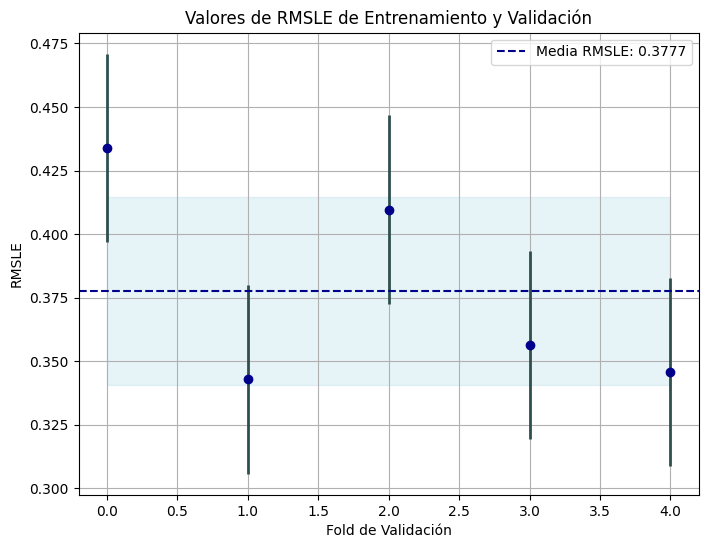

RESULTADOS
cv_results:
[-0.43387089 -0.34285344 -0.40964734 -0.35632772 -0.34577142]
mean_rmsle:
0.37769416186320653
std_rmsle:
0.037057505918426686


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import make_scorer, mean_squared_log_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score


# Transformar y_train con np.log1p
y_train_transformed = transformed_labels

# Definir el estimador con random_state=2
estimador = DecisionTreeRegressor(random_state=2)

# Función de puntuación usando RMSLE
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

# Hacer que la función de puntuación sea compatible con cross_val_predict
scorer = make_scorer(rmsle, greater_is_better=False)

# Realizar validación cruzada
y_pred_train = cross_val_predict(estimador, df_train, y_train_transformed, cv=5)

# Calcular RMSLE de entrenamiento
rmsle_train = rmsle(y_train_transformed, y_pred_train)

# Obtener RMSLE de entrenamiento y validación
cv_results = cross_val_score(estimador, df_train, y_train_transformed, cv=5, scoring=scorer)
rmsle_train = -cv_results  # Se multiplica por -1 ya que cross_val_score devuelve el negativo del score


# Calcular media y desviación estándar
mean_rmsle = np.mean(rmsle_train)
std_rmsle = np.std(rmsle_train)

# Graficar valores de RMSLE de entrenamiento y validación con colores azules y grises
plt.figure(figsize=(8, 6))
plt.errorbar(range(len(rmsle_train)), rmsle_train, yerr=std_rmsle, fmt='o', color='darkblue', ecolor='darkslategrey', elinewidth=2)
plt.axhline(mean_rmsle, color='darkblue', linestyle='--', label=f'Media RMSLE: {mean_rmsle:.4f}')
plt.fill_between(range(len(rmsle_train)), mean_rmsle - std_rmsle, mean_rmsle + std_rmsle, color='lightblue', alpha=0.3)
plt.xlabel('Fold de Validación')
plt.ylabel('RMSLE')
plt.title('Valores de RMSLE de Entrenamiento y Validación')
plt.legend()
plt.grid(True)
plt.show()

print("RESULTADOS")
print("cv_results:")
print(cv_results)
print("mean_rmsle:")
print(mean_rmsle)
print("std_rmsle:")
print(std_rmsle)

#### Preguntas:

*   ¿Qué fenómeno se logra apreciar en el gráfico? ¿A qué se debe? ¿Por qué esto es un problema?
*   Indicar y describir alguno de los hiper-parámetros que la función *DecisionTreeRegressor()* ofrece para limitar la complejidad del estimador.

Respuestas:
1. Hay una consistencia en la variabilidad de los resultados entre los pliegues (barras de longitud similar), pero el rendimiento del modelo varía entre los pliegues individuales (algunos pliegues tienen un error mayor o menor que la media representada por la línea punteada correspondiente a el valor promedio del error RMSLE).

2. La variabilidad en los resultados de los diferentes pliegues (folds) de la validación cruzada puede relacionarse con la complejidad del modelo. En el caso de DecisionTreeRegressor, existen hiperparámetros que pueden influir en la complejidad del árbol de decisiones y por tanto, en la variabilidad de los resultados. Ejemplos:

**Profundidad del árbol (max_depth)** : Especifica la máxima profundidad permitida para el árbol de decisiones y evita overfitting.
- **Número mínimo de muestras para dividir un nodo (`min_samples_split`):** Indica el número mínimo de muestras necesarias para dividir un nodo interno. Si el número de muestras en un nodo es menor que este valor, el nodo no se dividirá, lo que puede evitar divisiones que conduzcan a un sobreajuste.

- **Número mínimo de muestras en una hoja (`min_samples_leaf`):** Establece el número mínimo de muestras requeridas para ser una hoja. Este parámetro puede evitar divisiones que resulten en hojas con muy pocas muestras, lo que puede reducir el sobreajuste.

- **Número máximo de características consideradas para dividir (`max_features`):** Limita el número de características a considerar al buscar la mejor división. Reducir este número puede simplificar el modelo y reducir la complejidad.




## Ejemplo de ajuste de hiperparámetros:
### Resultados Anteriores:
- **cv_results:** `[-0.43387089, -0.34285344, -0.40964734, -0.35632772, -0.34577142]` (valores negativos por el ajuste de la métrica)
- **mean_rmsle:** `0.37769416186320653` (media del negativo de los resultados anteriores)

### Nuevos Resultados con Ajuste (Ajuste abajo):
- **cv_results:** `[0.34209977, 0.26101238, 0.31942036, 0.26570114, 0.24830981]`
- **mean_rmsle:** `0.28730869232398154`

### Interpretación:
- Los nuevos resultados tienen valores de RMSLE más bajos, indicando un mejor ajuste del modelo a los datos.
- La media del RMSLE disminuyó después del ajuste, lo que muestra una mejora general en el rendimiento del modelo.

Recordemos qué es el sobreajuste: el sobreajuste (overfitting) ocurre cuando un modelo se adapta demasiado a los datos de entrenamiento y pierde la capacidad de generalizar a nuevos datos o a datos que no ha visto antes. Esencialmente, el modelo "aprende" los detalles y el ruido en los datos de entrenamiento en lugar de capturar las tendencias generales o patrones verdaderos.


### Explicación:
- Los ajustes de hiperparámetros modificaron la estructura del árbol de decisiones.
- La reducción en los valores de RMSLE indica que el modelo mejoró su capacidad de generalización a datos no vistos, evitando el sobreajuste previo.


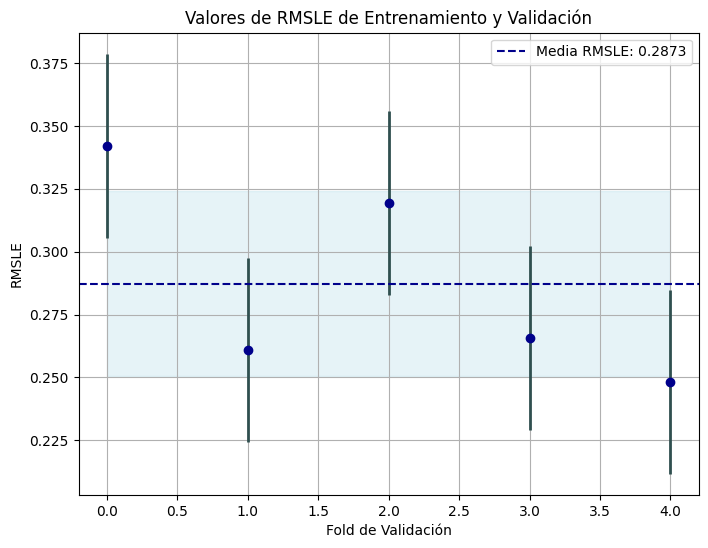

Nuevos resultados con ajuste:
cv_results: [0.34209977 0.26101238 0.31942036 0.26570114 0.24830981]
mean_rmsle: 0.28730869232398154


In [ ]:
# EJEMPLO DE AJUSTE

# Definir el estimador con ajuste de hiperparámetros
estimador_adj = DecisionTreeRegressor(random_state=2,
                                  min_samples_split=5,
                                  min_samples_leaf=2,
                                  max_depth=8)

# Volvemos a graficar con nuestro ajuste aplicado:
# Hacer que la función de puntuación sea compatible con cross_val_predict
scorer = make_scorer(rmsle, greater_is_better=False)

# Realizar validación cruzada
y_pred_train = cross_val_predict(estimador_adj, df_train, y_train_transformed, cv=5)

# Calcular RMSLE de entrenamiento
rmsle_train = rmsle(y_train_transformed, y_pred_train)

# Obtener RMSLE de entrenamiento y validación
cv_results = cross_val_score(estimador_adj, df_train, y_train_transformed, cv=5, scoring=scorer)
rmsle_train = -cv_results  # Se multiplica por -1 ya que cross_val_score devuelve el negativo del score


# Calcular media y desviación estándar
mean_rmsle = np.mean(rmsle_train)
std_rmsle = np.std(rmsle_train)

# Graficar valores de RMSLE de entrenamiento y validación con colores azules y grises
plt.figure(figsize=(8, 6))
plt.errorbar(range(len(rmsle_train)), rmsle_train, yerr=std_rmsle, fmt='o', color='darkblue', ecolor='darkslategrey', elinewidth=2)
plt.axhline(mean_rmsle, color='darkblue', linestyle='--', label=f'Media RMSLE: {mean_rmsle:.4f}')
plt.fill_between(range(len(rmsle_train)), mean_rmsle - std_rmsle, mean_rmsle + std_rmsle, color='lightblue', alpha=0.3)
plt.xlabel('Fold de Validación')
plt.ylabel('RMSLE')
plt.title('Valores de RMSLE de Entrenamiento y Validación')
plt.legend()
plt.grid(True)
plt.show()


# Imprimir los resultados actualizados
print("Nuevos resultados con ajuste:")
print("cv_results:", -cv_results)
print("mean_rmsle:", mean_rmsle)

#### Ejemplo Lack of smoothness


 - Domingo
 - Despejado o Parcialmente nublado
 - A las 19 horas
 - En primavera

Se observará el efecto de la temperatura en la predicción de alquileres de bicicletas.

 - ¿Cómo espera que sea dicho efecto en un rango de 10°C a 30°C?

Respuesta:

El "lack of smoothness" en machine learning se refiere a lo complicado que puede ser encontrar el mejor resultado (como minimizar un error o maximizar un acierto) cuando la función que estamos usando tiene partes difíciles de manejar.
Como ejemplo se tomará la siguiente situación:

La lógica y las deducciones de nuestro EDA nos llevarían a pensar que nuestro modelo debería de dar una mejora del número de bicicletas alquiladas a medida que contamos con una temperatura más cálida.

In [ ]:
index = 2685
Domingo = df_train.iloc[index:index+1]
Domingo


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month
2685,2,0,0,1,29.52,34.09,62,9.00,6


In [ ]:
## Se crea un dataframe con los datos del domingo
X_prueba = pd.concat([Domingo]*21,ignore_index=True)

index = 0
for k in np.linspace(10,30,21):
    X_prueba.loc[index,'temp']= k
    ## De igual manera se cambia la sensación térmica para mantener cierta coherencia
    X_prueba.loc[index,'atemp']= k
    index += 1

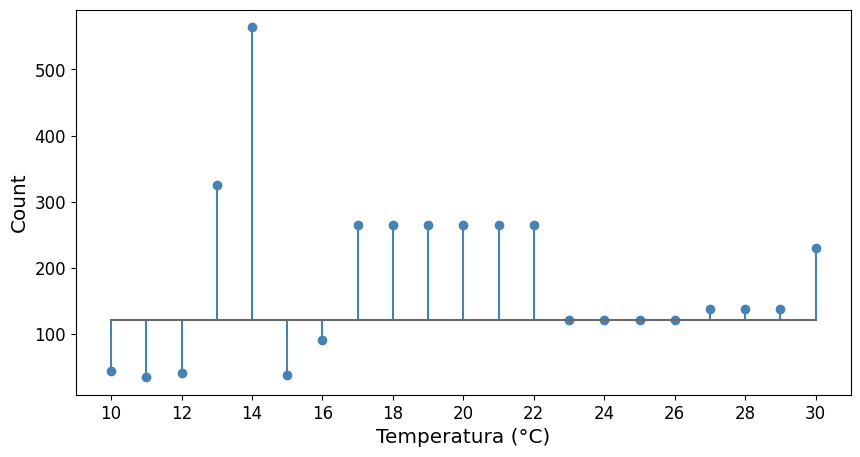

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Instanciar el modelo de árbol de decisión
# regressor es el nombre de la variable que contiene el modelo de arbol de decisión
azul = 'steelblue'
gris = 'dimgray'
regressor = DecisionTreeRegressor()
regressor.fit(df_train,y_train)
RandomState= 71
plt.figure(figsize=(10,5))
plt.stem(np.linspace(10,30,21),regressor.predict(X_prueba),bottom=120, linefmt=azul, markerfmt='o', basefmt=gris)
plt.xlabel('Temperatura (°C)',fontsize='x-large')
plt.ylabel('Count',fontsize='x-large')
plt.xticks(np.linspace(10,30,11),fontsize='large')
plt.yticks(fontsize='large')
plt.savefig('cambios_temp.png')
plt.show()

 - Observe el cambio que genera la temperatura a la salida (en particular el pasar de una temperatura de 23°C a 24°C, puede variar según la semilla, ver **Nota**).

 - ¿Qué desventaja le encuenta a los árboles de decisión en comparación con modelos lineales?

 **Nota:** Debido a la alta varianza de los Árboles de decisión los modelos obtenidos pueden variar de gran manera a efecto de pequeños cambios en el entrenamiento. En la carpeta se adjunta la imagen *cambios_temp.png* para que pueda discutir las preguntas a partir de la figura que se espera obtener.

##**Respuesta:**

La principal desventaja de los árboles de decisión en comparación con los modelos lineales es su propensión al sobreajuste y su alta variabilidad. Al cambiar la semilla nuestros resultados para el rango descrito cambian notablemente, dando unos resultados muy dispares.

### Ajuste Fino

#### Objetivos

*   Seleccionar uno de los hiper-parámetros y encontrar el mejor estimador.
*   Graficar los valores de RMSLE de entrenamiento y validación. Calcular la media y la desviación estandar e incluir esta última en el gráfico. Comparar con los resultados anteriores.
*   Graficar cómo varían los valores de RMSLE de entrenamiento y validación, para diferentes valores del hiper-parámetro.
*   Mostrar el mejor valor RMSLE (promedio de todos los *folds*) y el valor del hiper-parámetro.
*   Visualizar el árbol hasta los nodos de profundidad 2 utilizando la función *plot_tree()*. Agrandar el tamaño de la imagen de manera de poder leer la descripción de cada nodo.
*   Analizar las decisiones que está tomando el árbol para los primeros nodos.
*   Graficar los primeros 200 valores objetivo junto con sus predicciones.

**Nota:** Puede ser útil la función *save_gs_results()* que se encuentra en el archivo *comet_log.py* de la carpeta del taller para organizar sus experimentos con Comet.

In [ ]:
# Como ya no estamos usando cross_val, vamos a tratar nuestro conjunto de datos completo y realizar el correspondiente tratamiento y split
# Descargar el archivo desde GitHub usando wget
!wget https://raw.githubusercontent.com/IreneCalle/BikeSharingKaggle/main/day.csv


# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('day.csv')

# Cambiar nombre de columnas
df.rename(columns={'instant':'rec_id','dteday':'datetime','yr':'year','mnth':'month','weathersit':'weather_condition',
                       'hum':'humidity','cnt':'count'},inplace=True)

# Generar X e y
y = df['count']
columns_to_drop = ['registered', 'casual', 'atemp', 'rec_id', 'datetime', 'count']
X = df.drop(columns=columns_to_drop)

display(X)
display(y)

--2023-11-24 16:04:04--  https://raw.githubusercontent.com/IreneCalle/BikeSharingKaggle/main/day.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57569 (56K) [text/plain]
Saving to: ‘day.csv’

day.csv             100%[===================>]  56.22K  --.-KB/s    in 0.009s  

2023-11-24 16:04:04 (6.02 MB/s) - ‘day.csv’ saved [57569/57569]



,season,year,month,holiday,weekday,workingday,weather_condition,temp,humidity,windspeed
0,1,0,1,0,6,0,2,0.34,0.81,0.16
1,1,0,1,0,0,0,2,0.36,0.70,0.25
2,1,0,1,0,1,1,1,0.20,0.44,0.25
3,1,0,1,0,2,1,1,0.20,0.59,0.16
4,1,0,1,0,3,1,1,0.23,0.44,0.19
...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.25,0.65,0.35
727,1,1,12,0,5,1,2,0.25,0.59,0.16
728,1,1,12,0,6,0,2,0.25,0.75,0.12
729,1,1,12,0,0,0,1,0.26,0.48,0.35


0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: count, Length: 731, dtype: int64

In [ ]:
# train test split
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las formas (shapes) de los conjuntos creados
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

# decodificar los atributos categoricos
cat_attributes=['season','holiday','workingday','weather_condition','year']



Forma de X_train: (584, 10)
Forma de X_test: (147, 10)
Forma de y_train: (584,)
Forma de y_test: (147,)


In [ ]:
# Creacion de un nuevo decision tree y búsqueda de los hiperparámetros más óptimos
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_log_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

tree_model = DecisionTreeRegressor(random_state=42)



# Definir los hiperparámetros a buscar con GridSearchCV
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],  # Valores de profundidad del árbol
    'min_samples_split': [2, 5, 10, 15, 20],  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4, 8, 10]  # Número mínimo de muestras requeridas en un nodo hoja
}

# Inicializar GridSearchCV
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='neg_mean_squared_log_error', return_train_score=True)

# Entrenar el modelo con GridSearchCV en los datos de entrenamiento
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_


In [ ]:


# Predicciones en los conjuntos de entrenamiento y prueba
y_pred_train = best_estimator.predict(X_train)
y_pred_test = best_estimator.predict(X_test)
# Calcular RMSLE en los conjuntos de entrenamiento y prueba
rmsle_train = np.sqrt(mean_squared_log_error(y_train, y_pred_train))
rmsle_test = np.sqrt(mean_squared_log_error(y_test, y_pred_test))
# Mostrar resultados
print("Mejores hiperparámetros:", best_params)
print("RMSLE en entrenamiento:", rmsle_train)
print("RMSLE en prueba:", rmsle_test)


Mejores hiperparámetros: {'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2}
RMSLE en entrenamiento: 0.24643661301627326
RMSLE en prueba: 0.5074347138105405


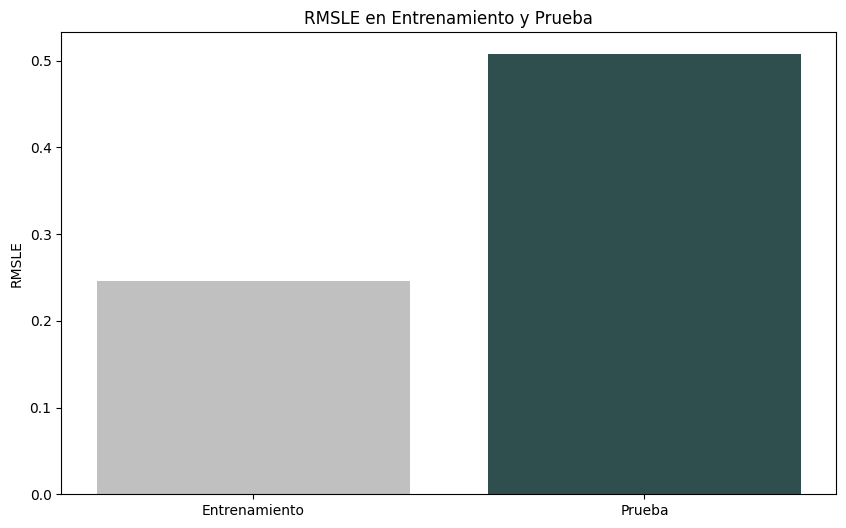

In [ ]:
# Graficar los valores de RMSLE de entrenamiento y validación
plt.bar(['Entrenamiento', 'Prueba'], [rmsle_train, rmsle_test], color=['silver', 'darkslategray'])
plt.ylabel('RMSLE')
plt.title('RMSLE en Entrenamiento y Prueba')
plt.show()



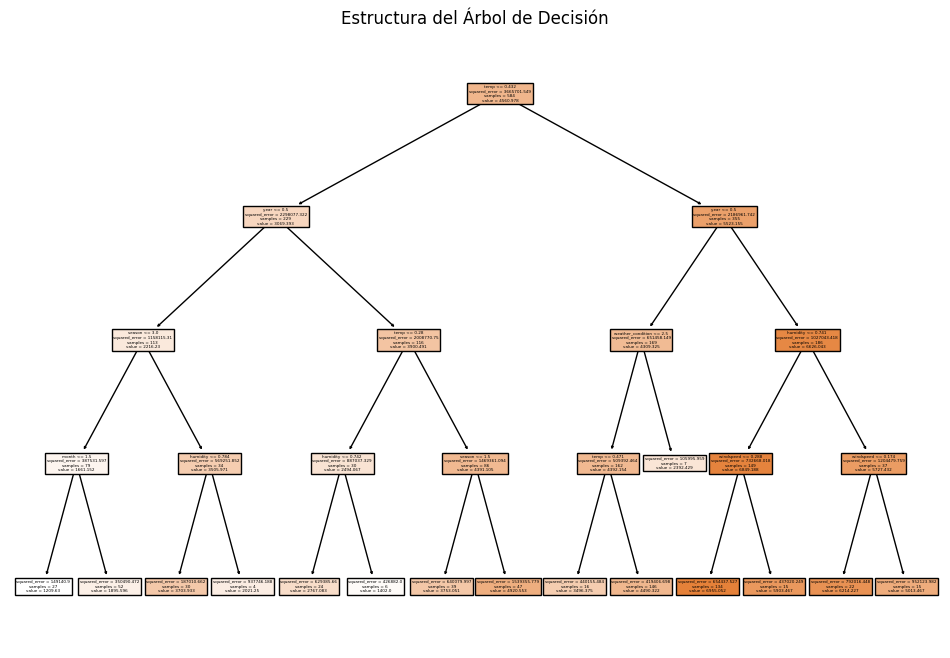

In [ ]:

from sklearn.tree import plot_tree

# Crear el modelo con los mejores hiperparámetros encontrados por GridSearchCV
best_model = grid_search.best_estimator_

# Graficar la estructura del árbol
plt.figure(figsize=(12, 8))
plot_tree(best_model, filled=True, feature_names=X_train.columns)
plt.title("Estructura del Árbol de Decisión")
plt.show()



In [ ]:

from sklearn.metrics import mean_squared_log_error

# Obtener los resultados de la búsqueda de hiperparámetros
results_df = pd.DataFrame(grid_search.cv_results_)

# Seleccionar las columnas relevantes para mostrar
relevant_columns = ['param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'mean_test_score', 'mean_train_score']

# Mostrar solo las columnas relevantes
results_df = results_df[relevant_columns]

# Calcular y agregar el RMSLE para los conjuntos de entrenamiento y prueba
best_estimator = grid_search.best_estimator_
y_pred_train = best_estimator.predict(X_train)
y_pred_test = best_estimator.predict(X_test)

rmsle_train = np.sqrt(mean_squared_log_error(y_train, y_pred_train))
rmsle_test = np.sqrt(mean_squared_log_error(y_test, y_pred_test))

results_df['RMSLE Train'] = rmsle_train
results_df['RMSLE Test'] = rmsle_test

# Mostrar la tabla de resultados
print(results_df)


    param_max_depth param_min_samples_split param_min_samples_leaf  \
0                 2                       2                      1   
1                 2                       5                      1   
2                 2                      10                      1   
3                 2                      15                      1   
4                 2                      20                      1   
..              ...                     ...                    ...   
220              10                       2                     10   
221              10                       5                     10   
222              10                      10                     10   
223              10                      15                     10   
224              10                      20                     10   

     mean_test_score  mean_train_score  RMSLE Train  RMSLE Test  
0              -0.13             -0.13         0.25        0.51  
1              -0.13       

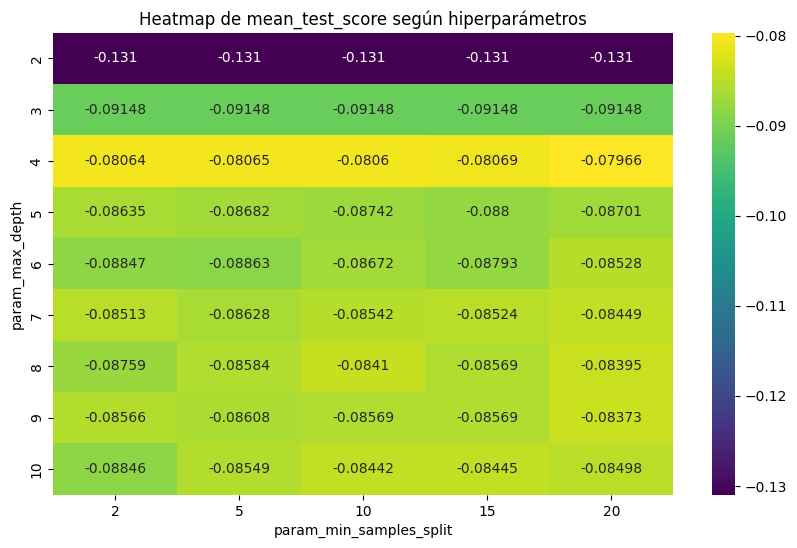

In [ ]:
# Crear un mapa de calor con Seaborn
plt.figure(figsize=(10, 6))
heatmap_data = results_df.pivot_table(index='param_max_depth', columns='param_min_samples_split', values='mean_test_score')
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.4g')
plt.title('Heatmap de mean_test_score según hiperparámetros')
plt.xlabel('param_min_samples_split')
plt.ylabel('param_max_depth')
plt.show()

## Parte 5 - Random Forest

#### Preguntas sobre métodos de Ensamble:

*   ¿Cuáles son las ventajes de los métodos de Ensamble?
*   ¿A qué métodos de ensamble está asociado *Random Forest*?.
*   Importar la función *RandomForestRegressor()* de *Scikit-Learn*.
*   Indicar y describir los principales hiper-parámetros correspondientes a los métodos de ensamble que ofrece la función.




##**Respuestas:**
### Ventajas de los métodos de Ensamble:

Los métodos de ensamble combinan múltiples modelos más simples para construir un modelo más robusto y preciso. Algunas de sus ventajas clave son:

1. **Mayor precisión:** Los métodos de ensamble suelen ofrecer una mayor precisión en la predicción en comparación con modelos individuales. Al combinar múltiples modelos, se reducen los errores individuales y se mejora la generalización.

2. **Reducción del sobreajuste:** Al utilizar modelos más simples en conjunto, los métodos de ensamble tienden a reducir el sobreajuste. La combinación de múltiples modelos puede ayudar a capturar patrones complejos mientras se evita la memorización de ruido en los datos.

3. **Robustez:** Los métodos de ensamble son más robustos frente a datos ruidosos o atípicos. Al considerar múltiples modelos, el impacto de predicciones erróneas de un solo modelo se reduce significativamente.

### Random Forest y métodos de ensamble:

Random Forest es un método de ensamble basado en árboles de decisión. Utiliza una técnica conocida como bagging (ensamblaje por bolsas) para construir múltiples árboles de decisión y combinar sus resultados. Cada árbol en el Random Forest se entrena de manera independiente con diferentes subconjuntos aleatorios del conjunto de datos y luego se promedian las predicciones de todos los árboles para obtener una predicción final.

### Principales hiperparámetros de RandomForestRegressor:

Algunos de los hiperparámetros clave asociados con RandomForestRegressor de Scikit-Learn son:

1. **n_estimators:** Número de árboles en el bosque (default=100). Aumentar este valor puede mejorar la precisión, pero también aumenta el tiempo de entrenamiento.

2. **max_depth:** Profundidad máxima de cada árbol. Controla la profundidad máxima de los árboles de decisión en el bosque.

3. **min_samples_split:** Número mínimo de muestras requeridas para dividir un nodo interno.

4. **min_samples_leaf:** Número mínimo de muestras requeridas en un nodo hoja.

5. **max_features:** Número máximo de características a considerar para dividir un nodo.

Estos hiperparámetros permiten ajustar la complejidad y el comportamiento del Random Forest, controlando la cantidad de ramificación de los árboles, la cantidad de muestras en nodos hoja y otras características que afectan la construcción de los árboles y la generalización del modelo.


#### Ajuste fino



*   Encontrar el mejor estimador para *Random Forest* usando como estimador base el encontrado en la parte 4.
*   Graficar los valores de RMSLE de entrenamiento y validación. Calcular la media y la desviación estandar e incluir esta última en el gráfico. Comparar con los resultados correspondientes de la parte 4.
*   Mostrar el mejor valor de RMSLE (promedio de todos los folds) y compararlo con el de la parte 4. Mostrar los valores seleccionados de los hiper-parámetros.
*   ¿Qué ventaja se pierde con repecto a usar un sólo árbol?
*   Graficar los primeros 200 valores objetivo junto con sus predicciones. Comparar con el gráfico correspondiente de la parte 4.
*   Mostrar la importancia de cada característica utilizando la variable *feature_importances_*.



In [ ]:
from sklearn.ensemble import RandomForestRegressor


# Crear el modelo RandomForestRegressor
model = RandomForestRegressor()

# Definir los hiperparámetros a buscar con GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar GridSearchCV
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_log_error', cv=5)

# Entrenar el modelo con GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)

# Predecir con el mejor modelo obtenido
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calcular RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print("RMSLE:", rmsle)



Mejores hiperparámetros encontrados: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
RMSLE: 0.47690914388096106


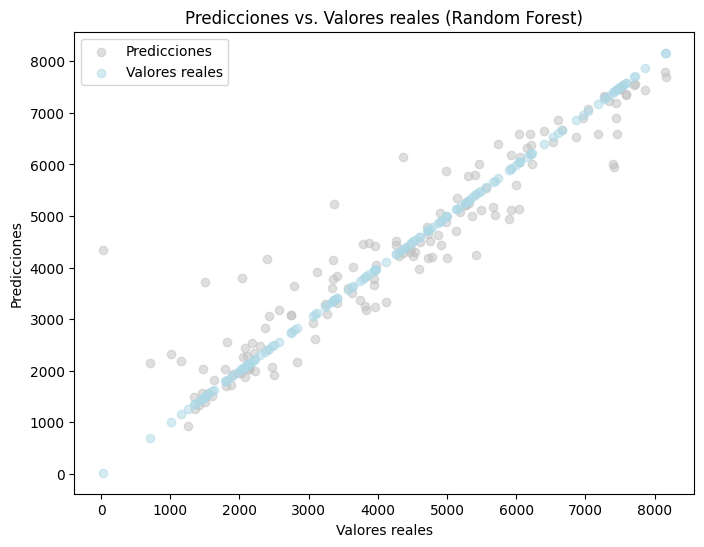

In [ ]:
# Graficar solo los primeros 200 valores objetivo y sus predicciones
plt.figure(figsize=(8, 6))
plt.scatter(y_test[:200], y_pred[:200], alpha=0.5, color='silver')  # Valores reales vs Predicciones
plt.scatter(y_test[:200], y_test[:200], alpha=0.5, color='lightblue')  # Valores reales vs Valores reales
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores reales (Random Forest)')
plt.legend(['Predicciones', 'Valores reales'], loc='upper left')
plt.show()

## Parte 6 - Gradient Boosting

#### XGBoost

*   Indicar cuál es la principal diferencia entre *Bagging* y *Boosting*.
*   Importar la función *XGBRegressor()* de la librería [*xgboost*](https://github.com/dmlc/xgboost).
*   Este estimador a diferencia de los anteriores puede devolver predicciones negativas para estos datos. Indicar en que caso se pueda dar esto y por qué esto no sucedía con los estimadores anteriores.
*   Las predicciones negativas no pueden ser evaluadas por RMSLE. Por lo tanto, crear una nueva función de evaluación que fuerce a cero todos los valores negativos de las predicciones y luego calcule el valor de RMSLE. Para esto se debe utilizar la función *make_score* de *Sickit-Learn*, para que la nueva función pueda ser utilizada en las funciones de selección de modelos.


**Nota:** *Scikit-Learn* ofrece una implementación de *Gradient Boosting*, pero *XGBRegressor()* es la implementación de [*eXtreme Gradient Boosting*](https://arxiv.org/pdf/1603.02754.pdf?__hstc=133736337.1bb630f9cde2cb5f07430159d50a3c91.1513641600097.1513641600098.1513641600099.1&__hssc=133736337.1.1513641600100&__hsfp=528229161) un variante del algoritmo tradicional que dentro de algunas ventajas requiere menos tiempo de entrenamiento. La implementación de las funciones de la librería son muy similares a las de *Scikit-Learn*, de igual forma aquí le dejamos un [ejemplo](https://www.kaggle.com/alexisbcook/xgboost) de cómo usarla.







**Nota:** A partir de la versión **0.21** *Scikit-Learn* también ofrece una implementación de *Gradient Boosting* optimizada para data-sets grandes: [Histogram-based Gradient Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingRegressor.html). Su funcionamiento se basa en agrupar en *bins* a los features de entrada, remplazandolos por integers. El número de *bins* es controlado por el hiperparámetro *max_bins*, el cual por defecto toma el valor 255 y no puede ser seteado a un valor mayor que este. En el Capítulo 7 del libro se encuentra más información acerca de este algoritmo.

## **Respuestas**:
1- La principal diferencia radica en cómo se combinan los modelos base. En Bagging (Bootstrap Aggregating), se entrena cada modelo base de forma independiente y luego se combinan sus predicciones mediante votación o promedio. En Boosting, los modelos se construyen de forma secuencial, donde cada nuevo modelo intenta corregir los errores de los modelos anteriores, dando más peso a las instancias que fueron mal predichas anteriormente.

2- XGBRegressor puede devolver predicciones negativas en casos donde el modelo ha aprendido a ajustarse demasiado a los datos de entrenamiento. Esto puede ocurrir cuando el modelo es demasiado complejo o si no se ha aplicado una regularización adecuada.

Los modelos anteriores pueden no haber producido predicciones negativas debido a sus características internas o a la forma en que manejan el ajuste de los datos. Sin embargo, es importante recalcar que es posible obtener predicciones negativas con cualquier modelo, dependiendo del contexto y de la complejidad del problema.



In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_log_error, make_scorer
import numpy as np

# Definir función de evaluación personalizada para RMSLE
def custom_rmsle(y_true, y_pred):
    y_pred_non_neg = np.maximum(y_pred, 0)  # Forzar valores negativos a cero
    return np.sqrt(mean_squared_log_error(y_true, y_pred_non_neg))

# Crear el modelo XGBoost
xgb_model = XGBRegressor()

# Definir los hiperparámetros a buscar con GridSearchCV
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Inicializar GridSearchCV para XGBoost
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, scoring=make_scorer(custom_rmsle), cv=5)

# Entrenar el modelo con GridSearchCV
grid_search_xgb.fit(X_train, y_train)

# Obtener los mejores hiperparámetros para XGBoost
best_params_xgb = grid_search_xgb.best_params_
print("Mejores hiperparámetros para XGBoost encontrados:", best_params_xgb)

# Predecir con el mejor modelo obtenido de XGBoost
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)

# Calcular RMSLE personalizado para XGBoost
rmsle_xgb = custom_rmsle(y_test, y_pred_xgb)
print("RMSLE para XGBoost:", rmsle_xgb)


Mejores hiperparámetros para XGBoost encontrados: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100}
RMSLE para XGBoost: 0.6917531485880309


#### Ajuste fino



*   Encontrar el mejor estimador para *Gradient Boosting* usando como estimador base el encontrado en la parte 4.
*   Graficar los valores de RMSLE de entrenamiento y validación. Calcular la media y la desviación estandar e incluir esta última en el gráfico. Comparar con los gráficos correspondientes.
*   Mostrar el mejor valor de RMSLE (promedio de todos los folds) y compararlo con los anteriores. Mostrar los valores seleccionados de los hiper-parámetros.
*   Graficar los primeros 200 valores objetivo junto con sus predicciones. Comparar con los gráficos corespondientes.
*   ¿Qué compromiso hay entre los hiper-parámetros *n_estimators* y *learning_rate*?



In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
gridentboosting = GradientBoostingRegressor()
from sklearn import metrics

rmsle_score = metrics.make_scorer(score_func=rmsle, greater_is_better=True)

random_params = {'random_state':[42], 'n_estimators' :[100, 120, 140]}
grident_params = {'n_estimators' : [100, 200], 'max_depth':[5, 6, 8, 10],'learning_rate':[0.05, 0.1, 0.2]}


gb_grid_cv=GridSearchCV(estimator=gridentboosting, param_grid=grident_params, scoring=rmsle_score, cv=5 )
log_y=np.log(y_train)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_log_error


# Definir la función RMSLE
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

# Crear un scorer de Scikit-Learn usando make_scorer
rmsle_score = make_scorer(score_func=rmsle, greater_is_better=True)

# Definir los parámetros para GridSearchCV
random_params = {'random_state': [42], 'n_estimators': [100, 120, 140]}
grident_params = {'n_estimators': [100, 200], 'max_depth': [5, 6, 8, 10], 'learning_rate': [0.05, 0.1, 0.2]}

# Inicializar el modelo Gradient Boosting
gridentboosting = GradientBoostingRegressor()

# Entrenar el modelo con GridSearchCV
gb_grid_cv = GridSearchCV(estimator=gridentboosting, param_grid=grident_params, scoring=rmsle_score, cv=5)
gb_grid_cv.fit(X_train, y_train)

# Obtener el mejor modelo y realizar predicciones con datos de prueba
best_gb_model = gb_grid_cv.best_estimator_
y_pred = best_gb_model.predict(X_test)
rmsle_result = rmsle(y_test, y_pred)  # Calcula el RMSLE

print("Mejores hiperparámetros:", gb_grid_cv.best_params_)
print("RMSLE:", rmsle_result)


Mejores hiperparámetros: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 200}
RMSLE: 0.49137984766179194


In [ ]:
print(gb_grid_cv.best_params_)


{'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 200}


## Parte 7 - Custom Transformers

- Construir un *Custom Transformer* que extraiga las caracterísicas temporales, siguiendo el ejemplo del capítulo 2 del libro.
## Custom Transformers en Scikit-Learn

Un "custom transformer" o "transformador personalizado" en el contexto de bibliotecas como Scikit-Learn es una clase que hereda de las clases `TransformerMixin` y `BaseEstimator` y que permite crear transformaciones personalizadas para preprocesamiento de datos.

En Scikit-Learn, los transformadores se utilizan en pipelines para preprocesar datos antes de aplicar modelos de machine learning. Un transformer personalizado te permite definir tu propia lógica de transformación de datos, lo que puede ser útil para realizar tareas específicas que no están cubiertas por los transformadores predefinidos en Scikit-Learn.

### Usos comunes de custom transformers:

1. **Preprocesamiento específico del dominio**: Puedes crear transformadores personalizados para realizar operaciones específicas para un dominio particular de datos. Por ejemplo, si necesitas aplicar una transformación específica a ciertas columnas o variables en tus datos antes de entrenar un modelo, puedes implementar esa transformación en un custom transformer.

2. **Ingeniería de características especializada**: Los custom transformers son útiles para realizar ingeniería de características más avanzada que no se puede lograr directamente con los transformadores incorporados de Scikit-Learn. Puedes combinar varias columnas, realizar operaciones personalizadas o crear nuevas características a partir de las existentes.

3. **Tratamiento de datos faltantes o outliers**: Puedes crear transformadores personalizados para manejar valores faltantes o outliers de una manera específica que se ajuste mejor a tu conjunto de datos y problema en particular.

4. **Normalización o escalado personalizado**: A veces, necesitas aplicar un tipo específico de normalización o escalado a tus datos que no está cubierto por los transformadores estándar de Scikit-Learn. En estos casos, puedes implementar tu propio transformer para realizar esa tarea específica.

Los custom transformers en Scikit-Learn te ofrecen flexibilidad para personalizar y aplicar transformaciones específicas a tus datos antes de entrenar un modelo de machine learning. Esto permite adaptar el preprocesamiento a las necesidades específicas de tu problema y mejorar potencialmente el rendimiento de tus modelos.


## Parte 8 - Generar un modelo

#### Objetivos:

 - Generar el mejor modelo posible. Se podrá explorar posibles mejoras en cualquiera de las siguientes etapas:

    - Parámetros óptimos del regresor.
    - Predicción de alquileres registered y casual por separado.
    - Separación de conjunto de Entrenamiento y Validación tomando en cuenta la generación del conjunto de Test del desafío.
    - Cambios en las características utilizadas. (Agregando o quitando alguna de ellas)

Primeramente probaremos otros estimadores...por si hubiera mayor eficiencia

In [ ]:

X_train.head()


,season,year,month,holiday,weekday,workingday,weather_condition,temp,humidity,windspeed
682,4,1,11,0,2,1,2,0.34,0.66,0.34
250,3,0,9,0,4,1,3,0.63,0.94,0.19
336,4,0,12,0,6,0,1,0.30,0.61,0.10
260,3,0,9,0,0,0,1,0.51,0.69,0.18
543,3,1,6,0,3,1,1,0.70,0.36,0.27


In [ ]:
# Probamos el modelo de regresion lineal
from sklearn.linear_model import LinearRegression


# Inicializar el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Asegurarse de que no haya valores negativos, ya que el logaritmo no está definido para valores negativos
y_pred[y_pred < 0] = 0

# Calcular el RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print(f'RMSLE using Linear Regression: {rmsle}')


RMSLE using Linear Regression: 0.4936707213856341


In [ ]:
from sklearn.linear_model import Ridge



# Inicializar el modelo de Regresión Ridge
ridge_model = Ridge(alpha=1.0)

# Entrenar el modelo
ridge_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = ridge_model.predict(X_test)

# Asegurarse de que no haya valores negativos, ya que el logaritmo no está definido para valores negativos
y_pred[y_pred < 0] = 0

# Calcular el RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print(f'RMSLE using Ridge Regression: {rmsle}')



RMSLE using Ridge Regression: 0.49546209046338907


In [ ]:
from sklearn.linear_model import Lasso

# Supongamos que ya tienes X_train, y_train, X_test, y_test
# También suponiendo que has realizado previamente el preprocesamiento necesario en tus datos

# Inicializar el modelo de Regresión Lasso
lasso_model = Lasso(alpha=0.1)  # Puedes ajustar el valor de alpha según sea necesario

# Entrenar el modelo
lasso_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = lasso_model.predict(X_test)

# Asegurarse de que no haya valores negativos, ya que el logaritmo no está definido para valores negativos
y_pred[y_pred < 0] = 0

# Calcular el RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print(f'RMSLE using Lasso Regression: {rmsle}')


RMSLE using Lasso Regression: 0.49378539208702504


In [ ]:
from sklearn.svm import SVR


# Supongamos que ya tienes X_train, y_train, X_test, y_test
# También suponiendo que has realizado previamente el preprocesamiento necesario en tus datos

# Inicializar el modelo de Regresión de Vectores de Soporte (SVR)
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # Puedes ajustar los parámetros kernel, C y epsilon según sea necesario

# Entrenar el modelo
svr_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = svr_model.predict(X_test)

# Asegurarse de que no haya valores negativos, ya que el logaritmo no está definido para valores negativos
y_pred[y_pred < 0] = 0

# Calcular el RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print(f'RMSLE using SVR: {rmsle}')


RMSLE using SVR: 0.7136390137046748


In [ ]:
# Como Ridge nos dio buenos datos, intentemos mejorarlo
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import uniform



# Definir los parámetros a buscar
param_dist = {'alpha': uniform(loc=0, scale=4)}

# Inicializar el modelo
ridge_model = Ridge()

# Inicializar RandomizedSearchCV
random_search = RandomizedSearchCV(ridge_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_log_error', random_state=42)

# Realizar la búsqueda de hiperparámetros
random_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_ridge_model = random_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_ridge_model.predict(X_test)

# Asegurarse de que no haya valores negativos
y_pred[y_pred < 0] = 0

# Calcular el RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print(f'RMSLE using Ridge Regression after hyperparameter tuning: {rmsle}')


RMSLE using Ridge Regression after hyperparameter tuning: 0.49596195534731263


Volvemos a nuestro Forest, porque parece que nos da buenos resultados en comparación con otros estimadores.

In [ ]:
# Parece que el forest regressor nos dio resultados tambien, ajustemos
# Primero, transformamos las etiquetas

y_train_transformed = np.log1p(y_train)


In [ ]:
# Hacemos un grid aleatorio para reducir tiempo de busqueda


# Definir los parámetros a buscar
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Inicializar el modelo Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Inicializar RandomizedSearchCV
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_log_error', random_state=42)

# Realizar la búsqueda de hiperparámetros
random_search.fit(X_train, y_train_transformed)

# Obtener el mejor modelo
best_rf_model = random_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred_transformed = best_rf_model.predict(X_test)

# Asegurarse de que no haya valores negativos en las predicciones transformadas
y_pred_transformed[y_pred_transformed < 0] = 0

# Calcular el RMSLE con predicciones transformadas
rmsle_transformed = np.sqrt(mean_squared_log_error(np.log1p(y_test), y_pred_transformed))
print(f'RMSLE using RandomForestRegressor with transformed labels: {rmsle_transformed}')

# Si es necesario, revertir la transformación logarítmica en las predicciones
y_pred_inverse = np.expm1(y_pred_transformed)

# Calcular el RMSLE con predicciones revertidas
rmsle_inverse = np.sqrt(mean_squared_log_error(y_test, y_pred_inverse))
print(f'RMSLE after inversing transformation: {rmsle_inverse}')


RMSLE using RandomForestRegressor with transformed labels: 0.07227669296703405
RMSLE after inversing transformation: 0.4858979476381651


In [ ]:
pip install scikit-optimize


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.7 MB/s eta 0:00:00


In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

# Definir el espacio de búsqueda de hiperparámetros
param_space = {
    'n_estimators': Integer(100, 300),
    'max_depth': Integer(2, 30),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 4),
    'bootstrap': Categorical([True, False])
}

# Inicializar el modelo RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Inicializar BayesSearchCV
bayes_search = BayesSearchCV(
    rf_model,
    search_spaces=param_space,
    n_iter=50,  # Número de iteraciones de búsqueda
    cv=5,  # Número de validaciones cruzadas
    scoring='neg_mean_squared_log_error',
    random_state=42,
    n_jobs=-1  # Usar todos los núcleos disponibles
)

# Realizar la búsqueda bayesiana de hiperparámetros
bayes_search.fit(X_train, y_train_transformed)

# Obtener el mejor modelo
best_rf_model = bayes_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred_transformed = best_rf_model.predict(X_test)

# Asegurarse de que no haya valores negativos en las predicciones transformadas
y_pred_transformed[y_pred_transformed < 0] = 0

# Calcular el RMSLE con predicciones transformadas
rmsle_transformed = np.sqrt(mean_squared_log_error(np.log1p(y_test), y_pred_transformed))
print(f'RMSLE usando RandomForestRegressor con etiquetas transformadas (Bayesian Search): {rmsle_transformed}')


RMSLE usando RandomForestRegressor con etiquetas transformadas (Bayesian Search): 0.07253438527447896


In [ ]:
# Revertir etiquetas

# Invertir la transformación logarítmica en las predicciones
y_pred_inverse = np.expm1(y_pred_transformed)

# Calcular el RMSLE con las predicciones invertidas
rmsle_inverse = np.sqrt(mean_squared_log_error(y_test, y_pred_inverse))
print(f'RMSLE después de invertir la transformación: {rmsle_inverse}')




RMSLE después de invertir la transformación: 0.48816305134110105


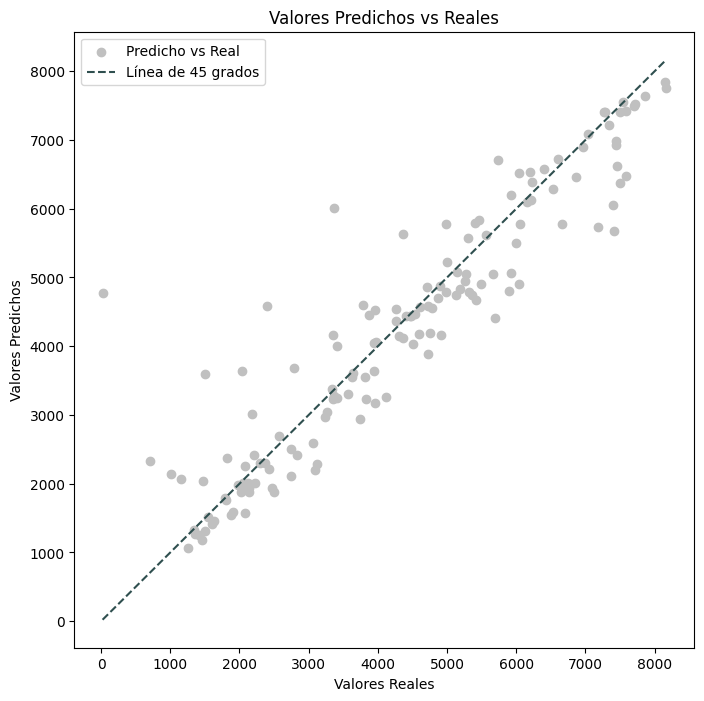

In [ ]:
# Graficar los valores predichos vs reales
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_inverse, color='silver', label='Predicho vs Real')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='darkslategray', label='Línea de 45 grados')
plt.title('Valores Predichos vs Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.legend()
plt.show()


<ipython-input-64-aea9187f9502>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="silver", label="Actual Value")
<ipython-input-64-aea9187f9502>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_inverse, hist=False, color='darkslategray', l

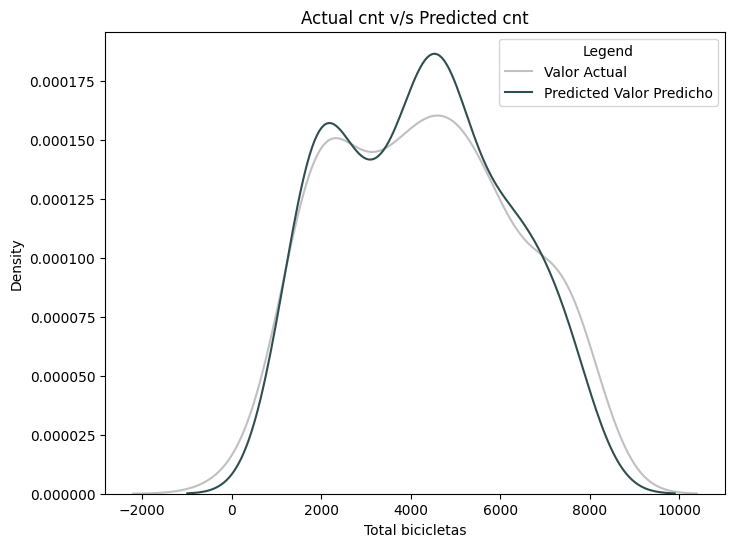

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

# Graficar la distribución de valores reales y predichos
plt.title("Actual cnt v/s Predicted cnt")
ax1 = sns.distplot(y_test, hist=False, color="silver", label="Actual Value")
sns.distplot(y_pred_inverse, hist=False, color='darkslategray', label="Fitted Value", ax=ax1)

# Configuración de leyenda y etiquetas
plt.legend(title='Legend', loc='upper right', labels=['Valor Actual', 'Predicted Valor Predicho'])
plt.xlabel('Total bicicletas')
plt.ylabel('Density')

plt.show()




Mejores hiperparámetros encontrados: OrderedDict([('bootstrap', True), ('max_depth', 28), ('min_samples_leaf', 1), ('min_samples_split', 4), ('n_estimators', 260)])
Métricas de evaluación en conjunto de entrenamiento:
RMSLE en conjunto de entrenamiento: 0.013545863012183742
RMSE en conjunto de entrenamiento: 4938.689614249872
MAE en conjunto de entrenamiento: 4552.671546359669
R² en conjunto de entrenamiento: -5.653748205844877

Métricas de evaluación en conjunto de prueba:
RMSLE en conjunto de prueba: 0.07253438527447896
RMSE en conjunto de prueba: 4717.066441068237
MAE en conjunto de prueba: 4271.141840428397
R² en conjunto de prueba: -4.548969822082357

DataFrame de resultados:
     Actual  Predicted
703    6606    6723.41
33     1550    1511.86
300    3747    2942.21
456    6041    4911.89
633    7538    7555.17


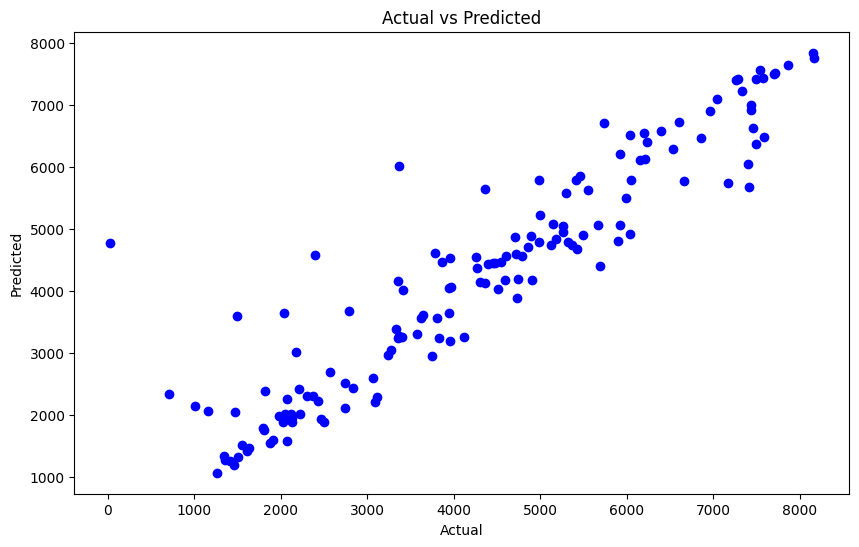

In [ ]:
# Informe final
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:", bayes_search.best_params_)

# Calcular y mostrar métricas de evaluación en conjunto de entrenamiento
print("Métricas de evaluación en conjunto de entrenamiento:")
y_pred_train = best_rf_model.predict(X_train)
print(f"RMSLE en conjunto de entrenamiento: {np.sqrt(mean_squared_log_error(np.log1p(y_train), y_pred_train))}")
print(f"RMSE en conjunto de entrenamiento: {np.sqrt(mean_squared_error(y_train, y_pred_train))}")
print(f"MAE en conjunto de entrenamiento: {mean_absolute_error(y_train, y_pred_train)}")
print(f"R² en conjunto de entrenamiento: {r2_score(y_train, y_pred_train)}")

# Calcular y mostrar métricas de evaluación en conjunto de prueba
print("\nMétricas de evaluación en conjunto de prueba:")
print(f"RMSLE en conjunto de prueba: {rmsle_transformed}")
print(f"RMSE en conjunto de prueba: {np.sqrt(mean_squared_error(y_test, y_pred_transformed))}")
print(f"MAE en conjunto de prueba: {mean_absolute_error(y_test, y_pred_transformed)}")
print(f"R² en conjunto de prueba: {r2_score(y_test, y_pred_transformed)}")

# Crear un DataFrame para comparar y_test vs y_pred
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_inverse})
print("\nDataFrame de resultados:")
print(results_df.head())

# Graficar y_test vs y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_inverse, color='darkslategray')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
